In [1]:
import tensorflow as tf

In [2]:
#prevents too much memory from being used, but for my case is not working

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
for gpu in gpus:
    print(gpu)

In [4]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [5]:
ds = tfds.load('fashion_mnist', split='train')

In [6]:
type(ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [7]:
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [8]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [9]:
ds.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

In [10]:
ds.as_numpy_iterator().next()['label']

np.int64(2)

In [11]:
import numpy as np

In [12]:
#setting up connection to the pipeline i.e. making an iterator

dataIterator = ds.as_numpy_iterator()

In [13]:
#getting data for a pipeline

dataIterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

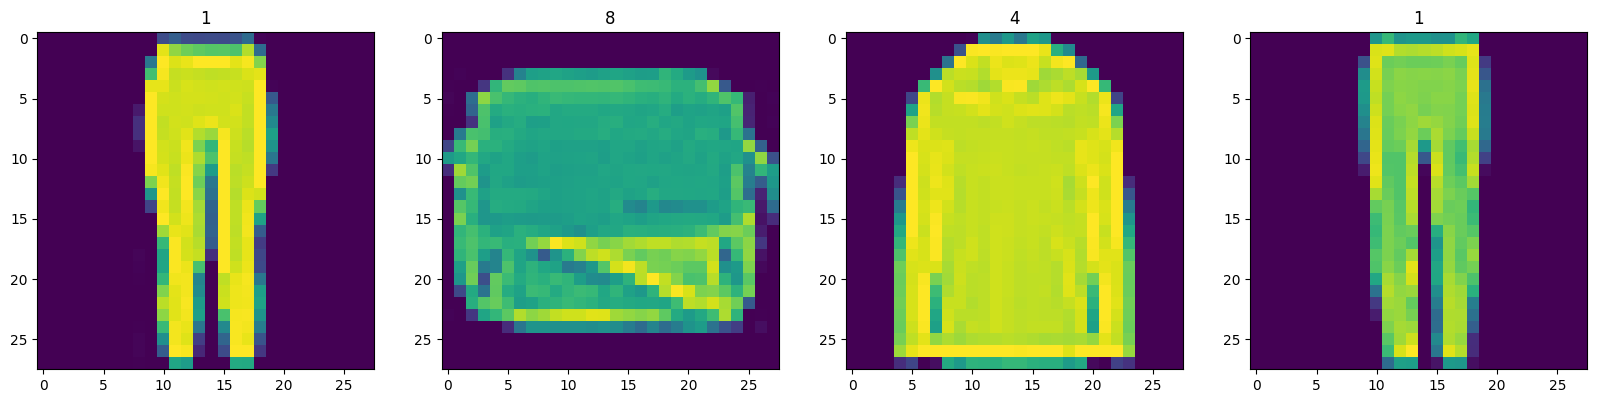

In [14]:
#setting up the subplot formatting
fig,ax = plt.subplots(ncols=4, figsize=(20,20))

#Looping four times and getting images
for idx in range(4):
    
    #getting an image and its label
    sample = dataIterator.next()
    
    #Plot the image using on a specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    
    #adding image label as the subplot title
    ax[idx].title.set_text(sample['label'])

In [15]:
def scale_images(data):
    image = data['image']
    return image/255

In [16]:
# Reloading the dataset
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle the data
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [17]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)